In [159]:
%matplotlib inline
from __future__ import division                                                 
import matplotlib.pyplot as plt                                                 
import scipy.optimize as op
from scipy.optimize import fmin_cg, fmin_bfgs, fmin_ncg, fmin
from mpl_toolkits.mplot3d import Axes3D
import numpy as np                                                              
import pandas as pd 

In [162]:
def plotData(X, y, f):
    plt1 = f.add_subplot(111)
    pos = np.where(y == 1)[0]
    neg = np.where(y == 0)[0]

    plt1.scatter(X[pos, 0], X[pos, 1], marker='x', color='r')
    plt1.scatter(X[neg, 0], X[neg, 1], marker='o', color='y')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(('y=1', 'y=0'), loc='lower left', fontsize=8, ncol=3, bbox_to_anchor=(0, -0.3))

In [163]:
def sigmoid(z):
    g = np.zeros(len(z))
    g = 1 / (1 + np.exp(-z))
    return g

In [226]:
def mapFeature(X1, X2):
    degree = 6
    if not X1.shape:
        l = 1
    else: 
        l = X1.shape[0]
    out = np.ones((l, 1))
    for i in range(1,degree+1):
        for j in range(0, i+1):
            out = np.hstack((out, (pow(X1, (i-j))*pow(X2, j)).reshape(l, 1)))
    return out

In [227]:
def costFn(theta, X, y, m, lam):
    h = sigmoid(X.dot(initial_theta))
    theta0 = theta
    J = 1 / m * np.sum((-(y * np.log(h))) - ((1-y) * np.log(1-h))) + (lam/(2*m) * theta0.T.dot(theta0))
    return J.flatten()
    #gg = 1 / m * ((X.T.dot(h-y)) + (lam * theta0))

In [228]:
def grad(theta, X, y, m, lam):
    h = sigmoid(X.dot(initial_theta))
    theta0 = initial_theta
    gg = 1 / m * ((X.T.dot(h-y)) + (lam * theta0))
    return gg.flatten()

In [264]:
def plotDecisionBoundary(theta, X, y):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    #uu, vv = np.meshgrid(u, v)
    z = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i, j] = (mapFeature(np.array(u[i]), np.array(v[j]))).dot(np.array(theta))

    z = z.T
    plt2 = plt.figure().add_subplot(111)
    plt2.contour(u, v, z)#, vmin=0, vmax=0)
    


Plotting data


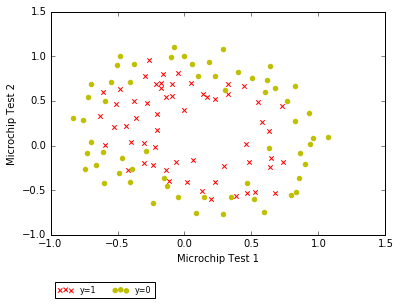

Cost at initial theta (zeros): 0.69314718056
grad: 
0.008475
0.018788
0.000078
0.050345
0.011501
0.037665
0.018356
0.007324
0.008192
0.023476
0.039349
0.002239
0.012860
0.003096
0.039303
0.019971
0.004330
0.003386
0.005838
0.004476
0.031008
0.031031
0.001097
0.006316
0.000409
0.007265
0.001376
0.038794


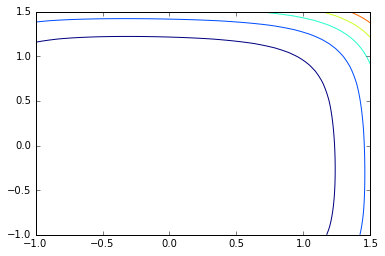

In [261]:
# ============================================== Plot data ==============================================  #
data = pd.read_csv('ex2data2.txt', sep=",", header=None)                        
data.columns = ['x1', 'x2', 'y']                                                       
x1 = data.iloc[:, 0].values[:, None]                                                     
x2 = data.iloc[:, 1].values[:, None]                                                    
y = data.iloc[:, 2].values[:, None]

# join x1 and x2 to make one array of X
X = np.concatenate((x1, x2), axis=1)

m, n = X.shape

print '\nPlotting data'
plotData(X, y, plt.figure())
plt.show()

# ========================================= Regularized Logistic Regression ================================ #
X1 = X[:, 0]
X2 = X[:, 1]

X = mapFeature(X1, X2)
initial_theta = np.zeros(X.shape[1]).reshape(X.shape[1], 1)

lam = 1
J = costFn(initial_theta, X, y, m, lam)
G = grad(initial_theta, X, y, m, lam)
print 'Cost at initial theta (zeros):', J[0]
print 'grad: '
print '\n'.join('%f' % val for val in G)

plotDecisionBoundary(G, X, y)

In [242]:
y1 = y.flatten()
# Result = op.minimize(fun = costFn, 
#                     x0 = initial_theta, 
#                     args = (X, y1, m, lam),
#                     method = 'newton-cg',
#                     options={'disp': True},
#                     jac=grad)
xopt = fmin_ncg(costFn, fprime=grad, x0=initial_theta, args=(X, y, m, lam), maxiter=400, disp=True, full_output=True )

Optimization terminated successfully.
         Current function value: 0.693147
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 4
         Hessian evaluations: 0


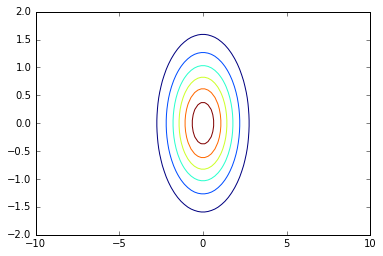

In [249]:
fig = plt.figure()
x = np.linspace(-10, 10, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
a = np.exp(-((X - 0) ** 2 + 3*(Y - 0) ** 2) / 4)
c = plt.contour(x, y, a)
plt.xlim(-10, 10)
plt.ylim(-2, 2)
plt.show()